In [37]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report

import matplotlib.pyplot as plt

import sklearn.preprocessing as skl_pre
import sklearn.linear_model as skl_lm
import sklearn.discriminant_analysis as skl_da
import sklearn.model_selection as skl_ms
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import make_scorer, recall_score, precision_score, f1_score, accuracy_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import cross_val_score, cross_val_predict
import seaborn as sns



import sys
sys.path.append('../src')

print('sys:', sys.executable)

from data_preprocessing import df, df_scaled, X, y, X_scaled, training_data_VT2026, get_pipeline


sys: c:\Users\shojn\Desktop\smask\machine_learning_project\venv\Scripts\python.exe


In [38]:
#amount of low demand and high demand respectively

amount_high = len(df[df['increase_stock'] == 'high_bike_demand'])
amount_low = len(df[df['increase_stock'] == 'low_bike_demand'])
print(f"High demand: {amount_high}, Low demand: {amount_low}")
partion_low = amount_low / (amount_low + amount_high)
print(f"Partition of low demand: {partion_low:.2f}")
df.head()
print(df.iloc[0])  # Print the first row of the DataFrame



High demand: 288, Low demand: 1312
Partition of low demand: 0.82
summertime                       0
temp                          -7.2
dew                          -15.0
humidity                     53.68
precip                         0.0
windspeed                     16.3
cloudcover                    31.6
visibility                    16.0
increase_stock     low_bike_demand
month_sin                      0.5
month_cos                 0.866025
hour_of_day_sin           0.965926
hour_of_day_cos           0.258819
day_0                        False
day_1                        False
day_2                        False
day_3                        False
day_4                        False
day_5                         True
day_6                        False
snow_or_not                      0
Name: 0, dtype: object


In [39]:
df_head = df.head()
df_scaled_head = df_scaled.head()
print(df_head)


   summertime  temp   dew  humidity  precip  windspeed  cloudcover  \
0           0  -7.2 -15.0     53.68     0.0       16.3        31.6   
1           0  -1.3 -12.8     40.97     0.0       23.9        85.7   
2           1  26.9  21.8     73.39     0.0        0.0        81.1   
3           0   3.1  -4.0     59.74     0.0       19.2         0.0   
4           0  11.7 -11.4     18.71     0.0       10.5        44.6   

   visibility   increase_stock  month_sin  ...  hour_of_day_sin  \
0        16.0  low_bike_demand   0.500000  ...         0.965926   
1        16.0  low_bike_demand   0.500000  ...        -0.707107   
2        16.0  low_bike_demand  -0.866025  ...        -0.707107   
3        16.0  low_bike_demand   0.500000  ...         0.258819   
4        16.0  low_bike_demand   1.000000  ...        -0.965926   

   hour_of_day_cos  day_0  day_1  day_2  day_3  day_4  day_5  day_6  \
0         0.258819  False  False  False  False  False   True  False   
1         0.707107  False  False  

In [40]:
#print(df_scaled_head)
print('x scaled ', X_scaled.head())


x scaled     summertime      temp       dew  humidity    precip  windspeed  cloudcover  \
0           0 -2.396831 -2.259957 -0.545836 -0.130133   0.422767   -1.013331   
1           0 -1.761017 -2.040229 -1.211239 -0.130133   1.391229    0.641118   
2           1  1.277959  1.415488  0.486035 -0.130133  -1.654331    0.500444   
4           0 -0.360070 -1.900403 -2.376610 -0.130133  -0.316323   -0.615774   
5           1  1.299512  0.516602 -1.210715 -0.130133   0.078707    0.506560   

   visibility  month_sin  month_cos  hour_of_day_sin  hour_of_day_cos  day_0  \
0    0.283313   0.675515   1.211763         1.343666         0.384577  False   
1    0.283313   0.675515   1.211763        -1.031798         1.016416  False   
2    0.283313  -1.253474  -0.724107        -1.031798         1.016416  False   
4    0.283313   1.381573  -0.015529        -1.399284        -0.345009   True   
5    0.283313   1.381573  -0.015529        -1.399284        -0.345009  False   

   day_1  day_2  day_3  day_

In [41]:
print('x', X.head())

x    summertime  temp   dew  humidity  precip  windspeed  cloudcover  \
0           0  -7.2 -15.0     53.68     0.0       16.3        31.6   
1           0  -1.3 -12.8     40.97     0.0       23.9        85.7   
2           1  26.9  21.8     73.39     0.0        0.0        81.1   
4           0  11.7 -11.4     18.71     0.0       10.5        44.6   
5           1  27.1  12.8     40.98     0.0       13.6        81.3   

   visibility  month_sin     month_cos  hour_of_day_sin  hour_of_day_cos  \
0        16.0   0.500000  8.660254e-01         0.965926         0.258819   
1        16.0   0.500000  8.660254e-01        -0.707107         0.707107   
2        16.0  -0.866025 -5.000000e-01        -0.707107         0.707107   
4        16.0   1.000000  6.123234e-17        -0.965926        -0.258819   
5        16.0   1.000000  6.123234e-17        -0.965926        -0.258819   

   day_0  day_1  day_2  day_3  day_4  day_5  day_6  snow_or_not  
0  False  False  False  False  False   True  False    

LDA assumes that the covarainces are the same across classes. If this assumption is violated, QDA may perform better. However, QDA is more prone to overfitting, especially with small sample sizes, because it estimates a separate covariance matrix for each class.

In [42]:
#compare covariances between classes
#scale to be able to interpret the results
from sklearn.preprocessing import StandardScaler

labels = y.unique()
cov1 = X_scaled[y == labels[0]].cov()
cov2 = X_scaled[y == labels[1]].cov()

diff = cov1 - cov2
fro_norm = np.linalg.norm(diff)  # storleken på skillnaden
#print(f"Frobeniusnormen av skillnaden mellan {labels[0]} och {labels[1]}: {fro_norm:.2f}")

try out models with differnt adjustments on data

LDA without k-fold cross-validation, unscaled and scaled

LDA with k-fold cross-validation, scaled and unsaled

In [43]:
def lda_kfold_auto(X, y):
    cols_to_scale = [col for col in X.columns if col not in ['increase_stock'] and col not in ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'snow_or_not', 'summertime']]

    # Kolumner att skala
    cols_to_scale = [col for col in X.columns if col not in 
                    ['increase_stock', 'day_0', 'day_1', 'day_2', 'day_3', 
                    'day_4', 'day_5', 'day_6', 'snow_or_not', 'summertime']]

    # Preprocessor
    preprocessor = ColumnTransformer([
        ("scale", StandardScaler(), cols_to_scale)
    ], remainder="passthrough")

    #classes, counts = np.unique(y, return_counts=True)
    #priors = 1 / counts  # invers proportion
    #priors = priors / priors.sum() 
    priors = [0.61, 0.39]

    # Pipeline med QDA
    pipeline = Pipeline([
        ("preprocess", preprocessor),
        ("model", skl_da.LinearDiscriminantAnalysis(priors=priors, tol=1e-4, ))
    ])
    
    # Cross-validation
    y_pred = cross_val_predict(pipeline, X, y, cv=5)

    
        # Classification report som DataFrame
    report_dict = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    print(report_df)
    return report_df



In [44]:
def qda_kfold_auto(X, y):
    cols_to_scale = [col for col in X.columns if col not in ['increase_stock'] and col not in ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6', 'snow_or_not', 'summertime']]

    # Kolumner att skala
    cols_to_scale = [col for col in X.columns if col not in 
                    ['increase_stock', 'day_0', 'day_1', 'day_2', 'day_3', 
                    'day_4', 'day_5', 'day_6', 'snow_or_not', 'summertime']]

    # Preprocessor
    preprocessor = ColumnTransformer([
        ("scale", StandardScaler(), cols_to_scale)
    ], remainder="passthrough")

    #classes, counts = np.unique(y, return_counts=True)
   # priors = 1 / counts  # invers proportion
   
   # priors = priors / priors.sum() 
    priors = [0.61, 0.39]  
    # Pipeline med QDA
   # pipeline = Pipeline([
    #    ("preprocess", preprocessor),
     #   ("model", skl_da.QuadraticDiscriminantAnalysis(reg_param=0.6, priors=priors))
    #])
    pipeline = get_pipeline(skl_da.QuadraticDiscriminantAnalysis(reg_param=0.21052631578947367, priors=priors))

    
    # Cross-validation
    y_pred = cross_val_predict(pipeline, X, y, cv=5)

    
        # Classification report som DataFrame
    report_dict = classification_report(y, y_pred, output_dict=True)
    report_df = pd.DataFrame(report_dict).transpose()
    
    print(report_df)
    return report_df



QDA without k-fold cross-validation, unscaled and scaled

QDA with k-fold cross-validation, unscaled and scaled

In [45]:
# df1 = df.copy()
results = {}
# #square root the windspeed since it is right skewed

# df1['windspeed_sqrt'] = np.sqrt(df1['windspeed'])
# X1 = df1.drop('increase_stock', axis=1)

# df2 = df.copy()
# df2.drop('weekday', axis=1, inplace=True)
# X2 = df2.drop('increase_stock', axis=1)

# df3 = df2.copy()
# df3.drop('humidity', axis=1, inplace=True)
# X3 = df3.drop('increase_stock', axis=1)

# df4= df3.copy()
# df4.drop('summertime', axis=1, inplace=True)
# X4 = df4.drop('increase_stock', axis=1)

# df5 = df4.copy()
# df5.drop('dew', axis=1, inplace=True)
# X5 = df5.drop('increase_stock', axis=1)

# df6 = df5.copy()
# hour_cols = ['hour_of_the_day_sin', 'hour_of_the_day_cos']
# day_cols = ['day_0', 'day_1', 'day_2', 'day_3', 'day_4', 'day_5', 'day_6']
# for d in day_cols:
#     for h in hour_cols:
#         df6[f"{d}_{h}"] = df6[d] * df6[h]
# X6 = df.drop('increase_stock', axis=1)

data_versions = {
    'original': (X, y),
    # 'windspeed_sqrt': (X1, y),
    # 'no_weekday': (X2, y),
    # 'no_humidity': (X3, y),
    # 'no_summertime': (X4, y),
    # 'no_dew': (X5, y),
    # 'hour_day_interaction': (X6, y)
}
models = {
    'LDA': lda_kfold_auto,
    'QDA': qda_kfold_auto
}
for model_name, model_func in models.items():
    for data_name, (X_data, y_data) in data_versions.items():
        print(f"Running {model_name} on {data_name} data:")
        result = model_func(X_data, y_data)
        results[f"{model_name}_{data_name}"] = result

#plot accuracy, precision, recall and f1-score for each model and data version
import matplotlib.pyplot as plt
#print(results)




Running LDA on original data:
                  precision    recall  f1-score      support
high_bike_demand   0.436590  0.882353  0.584145   238.000000
low_bike_demand    0.964956  0.739923  0.837588  1042.000000
accuracy           0.766406  0.766406  0.766406     0.766406
macro avg          0.700773  0.811138  0.710866  1280.000000
weighted avg       0.866713  0.766406  0.790464  1280.000000
Running QDA on original data:
                  precision    recall  f1-score      support
high_bike_demand   0.399287  0.941176  0.560701   238.000000
low_bike_demand    0.980529  0.676583  0.800681  1042.000000
accuracy           0.725781  0.725781  0.725781     0.725781
macro avg          0.689908  0.808880  0.680691  1280.000000
weighted avg       0.872454  0.725781  0.756060  1280.000000


C:\Users\shojn\AppData\Local\Temp\ipykernel_9032\4032096427.py:63: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x="Data", y="Value", hue="Score_Type", data=df_plot, ci=None)


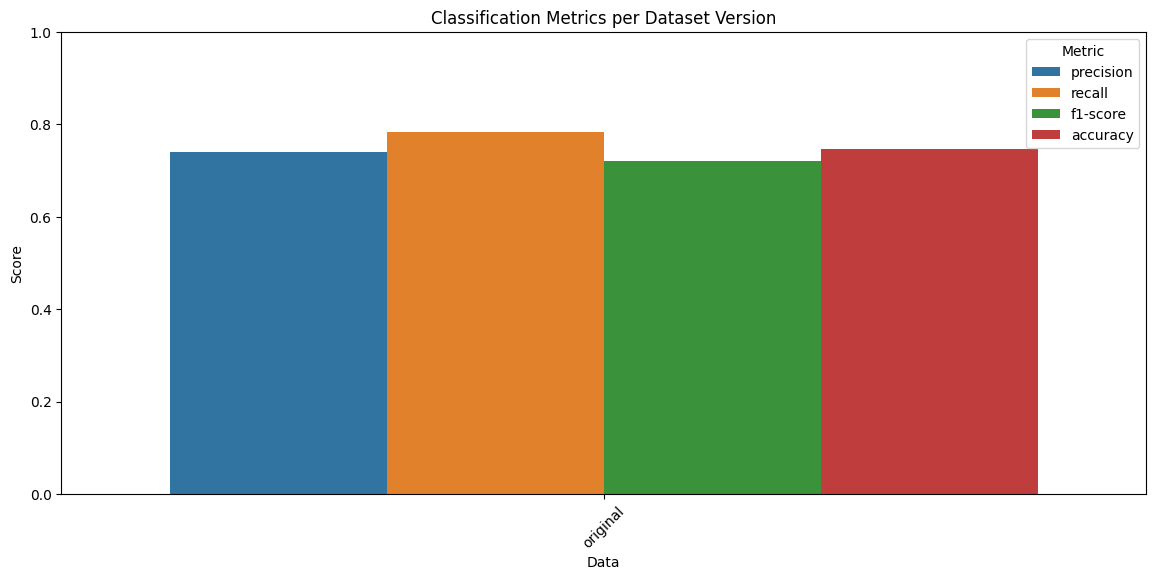

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

all_metrics = []

for key, report_df in results.items():
    # key = "LDA_original", "QDA_no_weekday", etc
    model_name, data_name = key.split("_", 1)
    
    # Om report_df är dict istället för DataFrame, konvertera
    if isinstance(report_df, dict):
        report_df = pd.DataFrame(report_df).transpose()
    
    # Extract accuracy separately
    accuracy = report_df.loc['accuracy', 'precision'] if 'accuracy' in report_df.index else None
    
    # Ta bort accuracy från report_df för melt
    report_df = report_df.drop('accuracy', errors='ignore')
    
    # Reset index så metrics blir en kolumn
    report_df = report_df.reset_index().rename(columns={"index": "Metric"})
    
    # Lägg till dataset och modell info
    report_df['Data'] = data_name
    report_df['Model'] = model_name
    
    # Lägg till accuracy som egen rad
    if accuracy is not None:
        acc_row = pd.DataFrame({"Metric": ["accuracy"], "precision": [accuracy],
                                "recall": [accuracy], "f1-score": [accuracy],
                                "Data": [data_name], "Model": [model_name]})
        report_df = pd.concat([report_df, acc_row], ignore_index=True)
    
    all_metrics.append(report_df)

# Slå ihop alla
df_metrics_long = pd.concat(all_metrics, ignore_index=True)

# Melt så det blir long-format för plotting
df_plot = df_metrics_long.melt(
    id_vars=['Model','Data','Metric'],
    value_vars=['precision','recall','f1-score'],
    var_name='Score_Type',
    value_name='Value'
)

# Lägg till accuracy också
accuracy_rows = df_metrics_long[df_metrics_long['Metric']=='accuracy']
accuracy_rows_melted = accuracy_rows.melt(
    id_vars=['Model','Data','Metric'],
    value_vars=['precision'],  # bara en kolumn, alla är samma
    var_name='Score_Type',
    value_name='Value'
)
accuracy_rows_melted['Score_Type'] = 'accuracy'

# Slå ihop med df_plot
df_plot = pd.concat([df_plot, accuracy_rows_melted], ignore_index=True)


plt.figure(figsize=(14,6))
sns.barplot(x="Data", y="Value", hue="Score_Type", data=df_plot, ci=None)
plt.title("Classification Metrics per Dataset Version")
plt.ylabel("Score")
plt.ylim(0,1)
plt.xticks(rotation=45)
plt.legend(title="Metric")
plt.show()



In [47]:
from sklearn.model_selection import GridSearchCV
lda_ = skl_da.LinearDiscriminantAnalysis()
param_grid = [
    {
        'solver': ['svd']
    },
    {
        'solver': ['lsqr', 'eigen'],
        'shrinkage': ['auto', 0.1, 0.5]
    }
]
grid = GridSearchCV(lda_, param_grid, cv=5)
grid.fit(X, y)
# Visa bästa CV-score



,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LinearDiscriminantAnalysis()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","[{'solver': ['svd']}, {'shrinkage': ['auto', 0.1, ...], 'solver': ['lsqr', 'eigen']}]"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",5
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the sco

In [48]:
qda_ = skl_da.QuadraticDiscriminantAnalysis()
# Parameterrutnät för GridSearch
param_grid = {
    'reg_param': np.linspace(0, 1, 20)
}

# GridSearchCV med 5-fold cross-validation
grid = GridSearchCV(qda_, param_grid, cv=5)

# Fit på dina features och target
grid.fit(X, y)
best_qda = grid.best_estimator_

print(grid.best_params_)
print("Bästa reg_param:", grid.best_params_)


{'reg_param': np.float64(0.21052631578947367)}
Bästa reg_param: {'reg_param': np.float64(0.21052631578947367)}


c:\Users\shojn\Desktop\smask\machine_learning_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py:490: FitFailedWarning: 
5 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\shojn\Desktop\smask\machine_learning_project\venv\Lib\site-packages\sklearn\model_selection\_validation.py", line 833, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\shojn\Desktop\smask\machine_learning_project\venv\Lib\site-packages\sklearn\base.py", line 1336, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\s